## Generate the QASM Dataset

In [275]:
import os
print(os.getcwd())


d:\course\thesis\Project2\QCD


In [274]:
from algorthims import *
from tqdm import tqdm

In [8]:
def QASM_generator(circuitname, max_qubit):
    # Create dir
    directory = "Circuits"
    if not os.path.exists(directory):
        os.makedirs(directory)

    
    circuit_func = None
    if circuitname == "grover":
        circuit_func = grover
    elif circuitname == "qft":
        circuit_func = qft
    elif circuitname == "qpe":
        circuit_func = qpe
    elif circuitname == "h_c":
        circuit_func = h_c
    elif circuitname == "rx_c":
        circuit_func = rx_c
    elif circuitname == "rx_gradually_c":
        circuit_func = rx_gradually_c 
    elif circuitname == "h_0":
        circuit_func = h_0
    else:
        print("Unsupported circuit name.")
        return

    for n in range(2, max_qubit + 1):
      
        circuit = circuit_func(n)
       
        qasm_str = circuit.qasm()

        filename = os.path.join(directory, f"{circuitname}_{n}.qasm")
        with open(filename, "w") as file:
            file.write(qasm_str)
        print(f"Saved {filename}")

In [9]:
# QASM_generator('qft',20)
# QASM_generator('qpe',20)
# QASM_generator('grover',20)
# QASM_generator('h_c',40)
# QASM_generator('rx_c',40)
# QASM_generator('rx_gradually_c',40)
QASM_generator('h_0',40)

Saved Circuits\h_0_2.qasm
Saved Circuits\h_0_3.qasm
Saved Circuits\h_0_4.qasm
Saved Circuits\h_0_5.qasm
Saved Circuits\h_0_6.qasm
Saved Circuits\h_0_7.qasm
Saved Circuits\h_0_8.qasm
Saved Circuits\h_0_9.qasm
Saved Circuits\h_0_10.qasm
Saved Circuits\h_0_11.qasm
Saved Circuits\h_0_12.qasm
Saved Circuits\h_0_13.qasm
Saved Circuits\h_0_14.qasm
Saved Circuits\h_0_15.qasm
Saved Circuits\h_0_16.qasm
Saved Circuits\h_0_17.qasm
Saved Circuits\h_0_18.qasm
Saved Circuits\h_0_19.qasm
Saved Circuits\h_0_20.qasm
Saved Circuits\h_0_21.qasm
Saved Circuits\h_0_22.qasm
Saved Circuits\h_0_23.qasm
Saved Circuits\h_0_24.qasm
Saved Circuits\h_0_25.qasm
Saved Circuits\h_0_26.qasm
Saved Circuits\h_0_27.qasm
Saved Circuits\h_0_28.qasm
Saved Circuits\h_0_29.qasm
Saved Circuits\h_0_30.qasm
Saved Circuits\h_0_31.qasm
Saved Circuits\h_0_32.qasm
Saved Circuits\h_0_33.qasm
Saved Circuits\h_0_34.qasm
Saved Circuits\h_0_35.qasm
Saved Circuits\h_0_36.qasm
Saved Circuits\h_0_37.qasm
Saved Circuits\h_0_38.qasm
Saved Cir

## genetic programming


In [273]:
from algorthims import *
from tqdm import tqdm

def QASM_generator(circuitname, max_qubit):
    directory = "Circuits"
    if not os.path.exists(directory):
        os.makedirs(directory)

    
    circuit_func = None
    if circuitname == "grover":
        circuit_func = grover
    elif circuitname == "qft":
        circuit_func = qft
    elif circuitname == "qpe":
        circuit_func = qpe
    elif circuitname == "h_c":
        circuit_func = h_c
    elif circuitname == "rx_c":
        circuit_func = rx_c
    elif circuitname == "rx_gradually_c":
        circuit_func = rx_gradually_c  
    else:
        print("Unsupported circuit name.")
        return

    for n in range(2, max_qubit + 1):
      
        circuit = circuit_func(n)
       
        qasm_str = circuit.qasm()

        filename = os.path.join(directory, f"{circuitname}_{n}.qasm")
        with open(filename, "w") as file:
            file.write(qasm_str)
        print(f"Saved {filename}")

The basic idea of genetic programming is apply operations which similar to a natural genetic process to a certain task. During each time of a replication(or so-called off-spring), we randomly select some parameters from the parameter space and do some measurement on our selection. The evaluation of these observation is task-dependent. We select some of with the higher perforamnce and keep them to the next generation. we repeat such iteration turn by turns, keeps the highest or some of the highest scores species(the entity of the selection of the parameter sapce) to the  latter off-spring. in the context of circuit decomplier. For a certain quantum circuit $C_A^N$ (A, correspond to the underlying algorithm and N correspond the the scale of the quabit), we want to learn the underlying pattern for such quantum circuit or in other words, let our circyit Decomplier to "explain" the quantum circuit. So the evaluation of each iteration in our genetic programing is how close the circit generated by our decomplier to the ground truth, the actual circuit of the $C_A^N$.

Therefore, to implement the Decomplier using Genetic algorthim, we first just start from the simplest case. We regard every circuit $C_A^N$ can be composed of some combination of the "print" operation and the "For" loop
- For the print operation, the parameter space is composed with the typical syntax in QASM file, it include "Gate Definiation" "register" and "gate operators", to begin from the bottle, we start with[h,q ]

- For the for loop, we need to determine the number of loop we need, we can can struct it as 
```python
for i in range (1,n,1):


In [16]:
# import ast
# import random
# import time
# from tqdm import tqdm
# from graphviz import Digraph

# def generate_random_circuit_ast(num_nodes, operations):

#     args = ast.arguments(
#         posonlyargs=[],
#         args=[ast.arg(arg='n', annotation=None)],
#         vararg=None,
#         kwonlyargs=[],
#         kw_defaults=[],
#         kwarg=None,
#         defaults=[]
#     )
    
#     body = [
#         ast.Assign(
#             targets=[ast.Name(id="qc", ctx=ast.Store())],
#             value=ast.Call(
#                 func=ast.Name(id='QuantumCircuit', ctx=ast.Load()),
#                 args=[ast.Name(id='n', ctx=ast.Load())],
#                 keywords=[]
#             )
#         )
#     ]
    
#     # Create a list of node types, ensure last one is 'operation'
#     node_types = ['operation' if i < num_nodes - 1 else 'operation' for i in range(num_nodes)]
#     # Randomly assign some nodes as loops but keep the last one as an operation
#     for i in range(num_nodes ):
#         if random.choice([True, False]):
#             node_types[i] = 'loop'
    
#     for i in range(num_nodes):
#         gate = random.choice(operations)
#         random_int = random.randint(1, 40)  # Calculate random number once for use in indexing
#         qubit_index_expr = ast.BinOp(
#             left=ast.Constant(value=random_int),
#             op=ast.Mod(),
#             right=ast.Name(id='n', ctx=ast.Load())
#         )

#         if node_types[i] == 'operation':
#             # Single quantum operation
            
#             # n_max = 100
#             # n = <from function input>
#             # a = rand(0,n_max) % n
#             # b = rand(1,n-1)
#             # c = (a + b) % n
#             # qc.cx(a,c)
        
#             if gate == 'cx':
#                 random_target_int = random.randint(1, 40)  # Another random integer for target qubit
#                 target_qubit_index_expr = ast.BinOp(
#                     left=ast.Constant(value=random_target_int),
#                     op=ast.Mod(),
#                     right=ast.Name(id='(n-2)', ctx=ast.Load())
#                 )
#                 gate_call = ast.Expr(value=ast.Call(
#                     func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
#                     args=[qubit_index_expr, target_qubit_index_expr],
#                     keywords=[]
#                 ))
#             else:
#                 gate_call = ast.Expr(value=ast.Call(
#                     func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
#                     args=[qubit_index_expr],
#                     keywords=[]
#                 ))
#             body.append(gate_call)
#         else:
#             # Loop containing a random operation
#             loop_body = []
#             if gate == 'cx':
#                 random_target_int = random.randint(1, 40)
#                 target_qubit_index_expr = ast.BinOp(
#                     left=ast.Constant(value=random_target_int),
#                     op=ast.Mod(),
#                     right=ast.Name(id='n', ctx=ast.Load())
#                 )
#                 gate_call = ast.Call(
#                     func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
#                     args=[ast.Name(id='i', ctx=ast.Load()), target_qubit_index_expr],
#                     keywords=[]
#                 )
#             else:
#                 if random.choice([True, False]):
#                     gate_call = ast.Call(
#                         func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
#                         args=[ast.Name(id='i', ctx=ast.Load())],
#                         keywords=[]
#                     )
#                 else:
#                      gate_call = ast.Call(
#                         func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
#                         args=[qubit_index_expr],
#                         keywords=[]
#                     )
#             loop_body.append(ast.Expr(value=gate_call))
#             loop = ast.For(
#                 target=ast.Name(id='i', ctx=ast.Store()),
#                 iter=ast.Call(func=ast.Name(id='range', ctx=ast.Load()), args=[ast.Name(id='n', ctx=ast.Load())], keywords=[]),
#                 body=loop_body,
#                 orelse=[]
#             )
#             body.append(loop)

#     body.append(ast.Return(value=ast.Name(id="qc", ctx=ast.Load())))

#     function_def = ast.FunctionDef(
#         name="generate_random_circuit_ast",
#         args=args,
#         body=body,
#         decorator_list=[],
#         returns=None,
#         type_comment=None
#     )

#     module = ast.Module(body=[function_def], type_ignores=[])
#     ast.fix_missing_locations(module)
#     return module

# # Example usage
# operations = ['h', 'x', 'cx']  # Available quantum gate types
# circuit_ast = generate_random_circuit_ast(5, operations)
# code = ast.unparse(circuit_ast)
# print(code)


def generate_random_circuit_ast(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.x(i)
    for i in range(n):
        qc.h(7 % n)
    qc.x(33 % n)
    return qc


In [421]:
exp=random_qubit_expr('n',include_i=True)
phase=random_phase_expr(include_i=True)
ast.unparse(exp)
ast.unparse(phase)


'pi * (1 / (2 ** i + (0 + 0)))'

In [285]:
import ast
import random
import time
from tqdm import tqdm
from graphviz import Digraph
def random_qubit_expr(n, include_i=False):
    """Generate a random qubit index expression using arithmetic, modulus, or simple variables."""
    # Decide randomly whether to return a simple variable (`i` or `n`) or a complex expression
    if random.choice([True, False]):
        # Simple return: either 'n' or 'i' (if loops are included)
        if include_i and random.choice([True, False]):
            return ast.Name(id='i', ctx=ast.Load())
        else:
            return ast.Name(id='n-1', ctx=ast.Load())
    else:
        # Generate a more complex arithmetic expression
        operators = [ast.Add(), ast.Sub(), ast.Mult()]
        operands = [ast.Name(id='n', ctx=ast.Load()), ast.BinOp(left=ast.Name(id='n', ctx=ast.Load()), right=ast.Constant(value=1), op=ast.Sub())]
        if include_i:
            operands.append(ast.Name(id='i', ctx=ast.Load()))

        expr = ast.BinOp(
            left=random.choice(operands),
            op=random.choice(operators),
            right=random.choice(operands)
        )

        # Ensure the index is always within the valid range [0, n-1]
        mod_expr = ast.BinOp(
            left=expr,
            op=ast.Mod(),
            right=ast.Name(id='n', ctx=ast.Load())
        )

        return mod_expr

def generate_random_circuit_ast(num_nodes, operations):
    args = ast.arguments(
        posonlyargs=[],
        args=[ast.arg(arg='n', annotation=None)],
        vararg=None,
        kwonlyargs=[],
        kw_defaults=[],
        kwarg=None,
        defaults=[]
    )
    
    body = [
        ast.Assign(
            targets=[ast.Name(id="qc", ctx=ast.Store())],
            value=ast.Call(
                func=ast.Name(id='QuantumCircuit', ctx=ast.Load()),
                args=[ast.Name(id='n', ctx=ast.Load())],
                keywords=[]
            )
        )
    ]
    
    for i in range(num_nodes):
        gate = random.choice(operations)

        if random.choice([True, False]):  # Randomly decide to use a loop or a single operation
            qubit_index_expr = random_qubit_expr('n', include_i=True) # Index for loop context
            loop_body = []
            if gate == 'cx':
                # 'cx' gate requires two indices in the loop
                target_qubit_index_expr = random_qubit_expr('n', include_i=True)
                gate_call = ast.Expr(value=ast.Call(
                    func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                    args=[qubit_index_expr, target_qubit_index_expr],
                    keywords=[]
                ))
            else:
                gate_call = ast.Expr(value=ast.Call(
                    func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                    args=[qubit_index_expr],
                    keywords=[]
                ))
            loop_body.append(gate_call)

            # Create a for loop to apply operation across a range
            loop = ast.For(
                target=ast.Name(id='i', ctx=ast.Store()),
                iter=ast.Call(func=ast.Name(id='range', ctx=ast.Load()), args=[ast.Name(id='n', ctx=ast.Load())], keywords=[]),
                body=loop_body,
                orelse=[]
            )
            body.append(loop)
        else:
            qubit_index_expr = random_qubit_expr('n', include_i=True) # Index out of loop context
            if gate == 'cx':
                target_qubit_index_expr = random_qubit_expr('n', include_i=False)
                gate_call = ast.Expr(value=ast.Call(
                    func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                    args=[qubit_index_expr, target_qubit_index_expr],
                    keywords=[]
                ))
            else:
                gate_call = ast.Expr(value=ast.Call(
                    func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                    args=[qubit_index_expr],
                    keywords=[]
                ))
            body.append(gate_call)

    
    body.append(ast.Return(value=ast.Name(id="qc", ctx=ast.Load())))

    function_def = ast.FunctionDef(
        name="generate_random_circuit_ast",
        args=args,
        body=body,
        decorator_list=[],
        returns=None,
        type_comment=None
    )

    module = ast.Module(body=[function_def], type_ignores=[])
    ast.fix_missing_locations(module)
    return module

def print_qubit_indices(node, n_value):
    """
    Traverse the AST and print each qubit index expression, evaluating them if possible,
    or replacing 'n' with a specific value.
    """
    class IndexPrinter(ast.NodeVisitor):
        def visit_Call(self, node):
            # Check if the node is a function call to a gate method
            if isinstance(node.func, ast.Attribute) and node.func.attr in ['x', 'h', 'cx']:
                # This handles single and double qubit operations
                for arg in node.args:
                    print(self.evaluate_expr(arg, n_value))
            self.generic_visit(node)

        def evaluate_expr(self, expr, n_value):
            # A helper method to safely evaluate expressions involving 'n' and 'i'
            if isinstance(expr, ast.Name) and expr.id == 'i':
                return 'i'  # Return 'i' directly
            try:
                # Compile and evaluate the expression with 'n' substituted
                compiled_expr = compile(ast.Expression(expr), filename="<ast>", mode="eval")
                return str(eval(compiled_expr, {"n": n_value, "i": "i"}))
            except Exception as e:
                return f"Error evaluating expression: {e}"

    # Instantiate and use the visitor
    visitor = IndexPrinter()
    visitor.visit(node)

def set_specific_n(module, n_value):
    """
    Prints out all the qubit indices after evaluating with a specific 'n' value.
    """
    print_qubit_indices(module, n_value)


# Example usage
operations = ['h', 'x', 'cx']  # Available quantum gate types
circuit_ast = generate_random_circuit_ast(1, operations)
code = ast.unparse(circuit_ast)
print(code)
set_specific_n(circuit_ast,2)


def generate_random_circuit_ast(n):
    qc = QuantumCircuit(n)
    qc.cx((i + n) % n, n-1)
    return qc
Error evaluating expression: can only concatenate str (not "int") to str
Error evaluating expression: name 'n-1' is not defined


In [403]:
import ast
import random
import time
from tqdm import tqdm
from graphviz import Digraph

def random_qubit_expr(n, include_i=False):
    """Generate a random qubit index expression using arithmetic, modulus, or simple variables."""
    if random.choice([True, False]):
        if include_i and random.choice([True, False]):
            return ast.Name(id='i', ctx=ast.Load())
        else:
            return ast.Name(id='n-1', ctx=ast.Load())
    else:
        operators = [ast.Add(), ast.Sub(), ast.Mult()]
        operands = [ast.Name(id='n', ctx=ast.Load()), ast.BinOp(left=ast.Name(id='n', ctx=ast.Load()), right=ast.Constant(value=1), op=ast.Sub())]
        if include_i:
            operands.append(ast.Name(id='i', ctx=ast.Load()))

        expr = ast.BinOp(
            left=random.choice(operands),
            op=random.choice(operators),
            right=random.choice(operands)
        )

        mod_expr = ast.BinOp(
            left=expr,
            op=ast.Mod(),
            right=ast.Name(id='n', ctx=ast.Load())
        )

        return mod_expr

def random_phase_expr(include_i=False):
    """Generate a random phase expression of the form pi * 1 / (2^a + b + c)."""
    # Define a
    a = random.choice([ast.Name(id='i', ctx=ast.Load()), ast.Constant(value=0)]) if include_i else ast.Constant(value=0)
    
    # Define b
    b = random.choice([ast.Name(id='n', ctx=ast.Load()), ast.Name(id='i', ctx=ast.Load()), ast.Constant(value=0)]) if include_i else random.choice([ast.Name(id='n', ctx=ast.Load()), ast.Constant(value=0)])
    
    # Define c
    c = ast.Constant(value=random.randint(0, 4))
    
    # Create the expression 2^a + b + c
    expr_inner = ast.BinOp(
        left=ast.BinOp(
            left=ast.Constant(value=2),
            op=ast.Pow(),
            right=a
        ),
        op=ast.Add(),
        right=ast.BinOp(
            left=b,
            op=ast.Add(),
            right=c
        )
    )
    
    # Create the expression pi * 1 / (2^a + b + c)
    phase_expr = ast.BinOp(
        left=ast.Name(id='pi', ctx=ast.Load()),
        op=ast.Mult(),
        right=ast.BinOp(
            left=ast.Constant(value=1),
            op=ast.Div(),
            right=expr_inner
        )
    )
    
    return phase_expr

def generate_random_circuit_ast(num_nodes, operations):
    args = ast.arguments(
        posonlyargs=[],
        args=[ast.arg(arg='n', annotation=None)],
        vararg=None,
        kwonlyargs=[],
        kw_defaults=[],
        kwarg=None,
        defaults=[]
    )
    
    body = [
        ast.Assign(
            targets=[ast.Name(id="qc", ctx=ast.Store())],
            value=ast.Call(
                func=ast.Name(id='QuantumCircuit', ctx=ast.Load()),
                args=[ast.Name(id='n', ctx=ast.Load())],
                keywords=[]
            )
        )
    ]
    
    for i in range(num_nodes):
        gate = random.choice(operations)

        if random.choice([True, False]):  # Randomly decide to use a loop or a single operation
            qubit_index_expr = random_qubit_expr('n', include_i=True)  # Index for loop context
            loop_body = []
            if gate == 'cx':
                target_qubit_index_expr = random_qubit_expr('n', include_i=True)
                gate_call = ast.Expr(value=ast.Call(
                    func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                    args=[qubit_index_expr, target_qubit_index_expr],
                    keywords=[]
                ))
            else:
                if gate in ['rx', 'ry', 'rz']:
                    phase_expr = random_phase_expr(include_i=True)
                    gate_call = ast.Expr(value=ast.Call(
                        func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                        args=[phase_expr, qubit_index_expr],
                        keywords=[]
                    ))
                else:
                    gate_call = ast.Expr(value=ast.Call(
                        func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                        args=[qubit_index_expr],
                        keywords=[]
                    ))
            loop_body.append(gate_call)

            loop = ast.For(
                target=ast.Name(id='i', ctx=ast.Store()),
                iter=ast.Call(func=ast.Name(id='range', ctx=ast.Load()), args=[ast.Name(id='n', ctx=ast.Load())], keywords=[]),
                body=loop_body,
                orelse=[]
            )
            body.append(loop)
        else:
            qubit_index_expr = random_qubit_expr('n', include_i=False)  # Index for non-loop context
            if gate == 'cx':
                target_qubit_index_expr = random_qubit_expr('n', include_i=False)
                gate_call = ast.Expr(value=ast.Call(
                    func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                    args=[qubit_index_expr, target_qubit_index_expr],
                    keywords=[]
                ))
            else:
                if gate in ['rx', 'ry', 'rz']:
                    phase_expr = random_phase_expr(include_i=False)
                    gate_call = ast.Expr(value=ast.Call(
                        func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                        args=[phase_expr, qubit_index_expr],
                        keywords=[]
                    ))
                else:
                    gate_call = ast.Expr(value=ast.Call(
                        func=ast.Attribute(value=ast.Name(id="qc", ctx=ast.Load()), attr=gate, ctx=ast.Load()),
                        args=[qubit_index_expr],
                        keywords=[]
                    ))
            body.append(gate_call)

    body.append(ast.Return(value=ast.Name(id="qc", ctx=ast.Load())))

    function_def = ast.FunctionDef(
        name="generate_random_circuit_ast",
        args=args,
        body=body,
        decorator_list=[],
        returns=None,
        type_comment=None
    )

    module = ast.Module(body=[function_def], type_ignores=[])
    ast.fix_missing_locations(module)
    return module

def print_qubit_indices(node, n_value):
    """
    Traverse the AST and print each qubit index expression, evaluating them if possible,
    or replacing 'n' with a specific value.
    """
    class IndexPrinter(ast.NodeVisitor):
        def visit_Call(self, node):
            if isinstance(node.func, ast.Attribute) and node.func.attr in ['x', 'h', 'cx', 'rx', 'ry', 'rz']:
                for arg in node.args:
                    print(self.evaluate_expr(arg, n_value))
            self.generic_visit(node)

        def evaluate_expr(self, expr, n_value):
            if isinstance(expr, ast.Name) and expr.id == 'i':
                return 'i'  # Return 'i' directly
            try:
                compiled_expr = compile(ast.Expression(expr), filename="<ast>", mode="eval")
                return str(eval(compiled_expr, {"n": n_value, "i": "i", "pi": 3.141592653589793}))
            except Exception as e:
                return f"Error evaluating expression: {e}"

    visitor = IndexPrinter()
    visitor.visit(node)

def set_specific_n(module, n_value):
    print_qubit_indices(module, n_value)

# Example usage
operations = ['h', 'x', 'cx', 'rx', 'ry', 'rz']  # Available quantum gate types
circuit_ast = generate_random_circuit_ast(5, operations)
code = ast.unparse(circuit_ast)
print(code)
set_specific_n(circuit_ast, 2)


def generate_random_circuit_ast(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.ry(pi * (1 / (2 ** 0 + (n + 2))), n-1)
    for i in range(n):
        qc.x((n - 1 + (n - 1)) % n)
    for i in range(n):
        qc.h(i)
    qc.x(n-1)
    return qc
i
0.6283185307179586
Error evaluating expression: name 'n-1' is not defined
0
i
Error evaluating expression: name 'n-1' is not defined


In [277]:
circuit_ast1 = generate_random_circuit_ast(3, operations)
code = ast.unparse(circuit_ast1)
print(code)
circuit_ast2 = generate_random_circuit_ast(3, operations)
code = ast.unparse(circuit_ast2)
print(code)
decompiler = genetic_Decompiler(operations=['h', 'x'],generations=50,algorithm_name='h_c',qubit_limit=20,
                                perform_crossover=True,perform_mutation=False,)

                
child1, child2 = decompiler.crossover(circuit_ast1, circuit_ast2)
code=ast.unparse(child1)
print(code)
code=ast.unparse(child2)
print(code)


def generate_random_circuit_ast(n):
    import math
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.x(n-1)
    for i in range(n):
        qc.cx(i, (i - n) % n)
    qc.cx((n - 1 - n) % n, (n - 1 - (n - 1)) % n)
    return qc
def generate_random_circuit_ast(n):
    import math
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.ry(pi / 3 / n, n-1)
    for i in range(n):
        qc.rz(i / n, i)
    qc.rx(n - pi / 3, (n - 1) * (n - 1) % n)
    return qc
def generate_random_circuit_ast(n):
    import math
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.x(n-1)
    for i in range(n):
        qc.cx(i, (i - n) % n)
    for i in range(n):
        qc.ry(pi / 3 / n, n-1)
    for i in range(n):
        qc.rz(i / n, i)
    qc.rx(n - pi / 3, (n - 1) * (n - 1) % n)
    return qc
def generate_random_circuit_ast(n):
    import math
    qc = QuantumCircuit(n)
    qc.cx((n - 1 - n) % n, (n - 1 - (n - 1)) % n)
    return qc


In [465]:
import subprocess
import os
import shutil
import importlib.util
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import Operator, state_fidelity
import Levenshtein

class genetic_Decompiler:
    def __init__(self, algorithm_name, qubit_limit=20, generations=100, pop_size=50, max_length=10, perform_crossover=True,
                crossover_rate=0.3, new_gen_rate=0.2,mutation_rate=0.1,compare_method='l_by_l',
                  perform_mutation=True, selection_method='tournament',operations = ['h', 'x', 'cx']):
        self.algorithm_name = algorithm_name
        self.qubit_limit = qubit_limit
        self.generations = generations
        self.pop_size = pop_size
        self.max_length = max_length
        self.crossover_rate=crossover_rate
        self.mutation_rate=mutation_rate
        self.new_gen_rate=new_gen_rate
        self.perform_crossover = perform_crossover
        self.compare_method=compare_method
        self.perform_mutation = perform_mutation
        self.selection_method = selection_method
        self.operations=operations
        # Initialize the path for saving files related to the algorithm
        self.path = os.path.join('genetic_deQ', self.algorithm_name)
        self.qasm_path=os.path.join('genetic_deQ_qasm', self.algorithm_name)
        os.makedirs(self.path, exist_ok=True)  # Create the directory if it does not exist
        os.makedirs(self.qasm_path, exist_ok=True) 
 

    def generate_initial_population(self,size):
        population = []
        for _ in range(size):
            # num_qubits = random.randint(2, self.qubit_limit)
            num_nodes = random.randint(1, self.max_length)
            ast_circuit = generate_random_circuit_ast( num_nodes,self.operations)
            population.append(ast_circuit)
        return population

    def mutate(self, ast_circuit):
        # Randomly select mutation position
        num_operations = len(ast_circuit.body[0].body) - 1
        mutation_index = random.randint(1, num_operations - 1)
        
        # Randomly select mutation type
        mutation_type = random.choice(['insert', 'modify'])
        
        if mutation_type == 'insert':
            # Insert a new quantum gate
            new_gate_ast = generate_random_circuit_ast(1, self.operations)  # Generate AST for one random gate
            ast_circuit.body[0].body.insert(mutation_index, new_gate_ast.body[0].body[1])  # Insert the new gate
            
        elif mutation_type == 'modify':
            # Modify an existing quantum gate
            existing_gate = ast_circuit.body[0].body[mutation_index]
            if isinstance(existing_gate, ast.Expr):
                new_gate_ast = generate_random_circuit_ast(1, self.operations)
                ast_circuit.body[0].body[mutation_index] = new_gate_ast.body[0].body[1]  # Replace the gate
        
        ast.fix_missing_locations(ast_circuit)
        return ast_circuit

    def crossover(self, parent1, parent2):
        # Select crossover points
        index1 = random.randint(1, len(parent1.body[0].body) - 2)
        index2 = random.randint(1, len(parent2.body[0].body) - 2)
        
        # Swap subcircuits
        new_body1 = parent1.body[0].body[:index1] + parent2.body[0].body[index2:]
        new_body2 = parent2.body[0].body[:index2] + parent1.body[0].body[index1:]
        
        # Construct new ASTs
        child1 = ast.Module(body=[ast.FunctionDef(
            name=parent1.body[0].name, 
            args=parent1.body[0].args, 
            body=new_body1, 
            decorator_list=[]
        )], type_ignores=[])
        
        child2 = ast.Module(body=[ast.FunctionDef(
            name=parent2.body[0].name, 
            args=parent2.body[0].args, 
            body=new_body2, 
            decorator_list=[]
        )], type_ignores=[])
        
        ast.fix_missing_locations(child1)
        ast.fix_missing_locations(child2)
        
        return child1, child2

    def select_parents(self, population, fitness_scores, selection_method='tournament', k=3):
        if selection_method == 'roulette':
            return self.roulette_wheel_selection(population, fitness_scores)
        elif selection_method == 'tournament':
            return self.tournament_selection(population, fitness_scores, k)
        elif selection_method == 'rank':
            return self.rank_selection(population, fitness_scores)
        elif selection_method == 'random':
            return self.random_selection(population)
        elif selection_method == 'weighted_roulette':
            return self.weighted_roulette_wheel_selection(population, fitness_scores)
        else:
            raise ValueError(f"Unknown selection method: {selection_method}")
    
    def roulette_wheel_selection(self, population, fitness_scores):
        total_fitness = sum(fitness_scores)
        probabilities = [score / total_fitness for score in fitness_scores]
        selected_indices = random.choices(range(len(population)), weights=probabilities, k=2)
        return population[selected_indices[0]], population[selected_indices[1]]

    def tournament_selection(self, population, fitness_scores, k=3):
        selected_indices = random.sample(range(len(population)), k)
        selected_individuals = [(fitness_scores[i], population[i]) for i in selected_indices]
        parent1 = max(selected_individuals, key=lambda x: x[0])[1]
        parent2 = max(selected_individuals, key=lambda x: x[0])[1]
        return parent1, parent2

    def rank_selection(self, population, fitness_scores):
        sorted_population = sorted(zip(fitness_scores, population), key=lambda x: x[0])
        rank_probabilities = [(i + 1) / len(sorted_population) for i in range(len(sorted_population))]
        selected_indices = random.choices(range(len(population)), weights=rank_probabilities, k=2)
        return sorted_population[selected_indices[0]][1], sorted_population[selected_indices[1]][1]

    def random_selection(self, population):
        parent1, parent2 = random.sample(population, 2)
        return parent1, parent2

    def weighted_roulette_wheel_selection(self, population, fitness_scores, weight=2.0):
        total_fitness = sum(fitness_scores)
        weighted_fitness = [score ** weight for score in fitness_scores]
        total_weighted_fitness = sum(weighted_fitness)
        probabilities = [wf / total_weighted_fitness for wf in weighted_fitness]
        selected_indices = random.choices(range(len(population)), weights=probabilities, k=2)
        return population[selected_indices[0]], population[selected_indices[1]]

    def save(self, population):
    # Clear all files in the target directory before saving new files
        for filename in os.listdir(self.path):
            file_path = os.path.join(self.path, filename)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)  # Remove file
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)  # Remove directory
            except Exception as e:
                print(f'Failed to delete {file_path}. Reason: {e}')

        # Iterate over the population and save each individual's Python code to a file
        for index, individual in enumerate(population):
            # Convert AST to Python code
            python_code = ast.unparse(individual)

            # Create the filename, including the algorithm name and index
            filename = os.path.join(self.path, f"{self.algorithm_name}_{index}.py")
            
            # Write Python code to the file
            with open(filename, 'w') as file:
                file.write(python_code)

    def save_qasm(self):
     
        for filename in os.listdir(self.path):
            if filename.endswith('.py'):
                full_py_path = os.path.join(self.path, filename)
                
                # Read and modify the script as discussed above
                with open(full_py_path, 'r') as file:
                    module_code = "from qiskit import QuantumCircuit\nimport numpy as np\nimport random\nfrom math import pi\n" + file.read()

                
                local_namespace = {}
                exec(module_code, local_namespace)
                
                # Set up the directory for QASM files
                file_base_name = filename[:-3]  # Remove '.py' extension
                qasm_dir_path = os.path.join(self.qasm_path, file_base_name)
                os.makedirs(qasm_dir_path, exist_ok=True)
                
                # Generate QASM files for each qubit count
                for i in range(2, 41):
                    qc = local_namespace['generate_random_circuit_ast'](i)
                    qasm_output = qc.qasm()
                    qasm_filename = os.path.join(qasm_dir_path, f"{file_base_name}_{i}.qasm")
                    with open(qasm_filename, 'w') as f:
                        f.write(qasm_output)  
    
    def qasm_to_unitary(self, qasm_file_path):
        # Read QASM file and create a quantum circuit
        with open(qasm_file_path, 'r') as file:
            qasm_str = file.read()
        
        quantum_circuit = QuantumCircuit.from_qasm_str(qasm_str)
        
        # Use Aer simulator to get the unitary matrix
        backend = Aer.get_backend('unitary_simulator')
        transpiled_circuit = transpile(quantum_circuit, backend)
        
        # Get the unitary matrix
        job = backend.run(transpiled_circuit)
        unitary_matrix = job.result().get_unitary(transpiled_circuit)
        
        return unitary_matrix


    def qasm_to_gate_sequence(self, qasm_file_path):
        # Read QASM file and create a quantum circuit
        with open(qasm_file_path, 'r') as file:
            qasm_str = file.read()
        
        quantum_circuit = QuantumCircuit.from_qasm_str(qasm_str)
        
        # Extract gate sequence
        gate_sequence = []
        for instruction in quantum_circuit.data:
            gate_name = instruction[0].name
            qubits = [qubit.index for qubit in instruction[1]]
            if gate_name in ['rx', 'ry', 'rz']:
                params = [param for param in instruction[0].params]
                gate_sequence.append((gate_name, tuple(qubits), params))
            else:
                gate_sequence.append((gate_name, tuple(qubits)))
        
        return gate_sequence
    
    
    def gate_sequence_similarity(self, seq1, seq2):
        seq1_str = ' '.join([f"{gate[0]}{gate[1]}{[f'{param:.6f}' for param in gate[2]]}" if len(gate) == 3 else f"{gate[0]}{gate[1]}" for gate in seq1])
        seq2_str = ' '.join([f"{gate[0]}{gate[1]}{[f'{param:.6f}' for param in gate[2]]}" if len(gate) == 3 else f"{gate[0]}{gate[1]}" for gate in seq2])
        
        ### Debugging line
        # print(f"Sequence 1: {seq1_str}")
        # print(f"Sequence 2: {seq2_str}")
        
        max_len = max(len(seq1_str), len(seq2_str))
        if max_len == 0:
            return 1.0
        
        return 1 - Levenshtein.distance(seq1_str, seq2_str) / max_len

    def gate_frequency_similarity(self, qasm_file_path1, qasm_file_path2):
        def get_gate_frequencies(qasm_file_path):
            with open(qasm_file_path, 'r') as file:
                qasm_str = file.read()
            
            quantum_circuit = QuantumCircuit.from_qasm_str(qasm_str)
            gate_count = {}
            for instruction in quantum_circuit.data:
                gate_name = instruction[0].name
                if gate_name in gate_count:
                    gate_count[gate_name] += 1
                else:
                    gate_count[gate_name] = 1
            return gate_count

        freq1 = get_gate_frequencies(qasm_file_path1)
        freq2 = get_gate_frequencies(qasm_file_path2)
        
        all_gates = set(freq1.keys()).union(set(freq2.keys()))
        vec1 = [freq1.get(gate, 0) for gate in all_gates]
        vec2 = [freq2.get(gate, 0) for gate in all_gates]
        
        dot_product = sum([vec1[i] * vec2[i] for i in range(len(all_gates))])
        norm1 = sum([x ** 2 for x in vec1]) ** 0.5
        norm2 = sum([x ** 2 for x in vec2]) ** 0.5
        
        return dot_product / (norm1 * norm2)


    def compare_qasm(self, qasm, target_qasm):
        try:
            if self.compare_method == 'intersection':
                with open(qasm, 'r') as file1, open(target_qasm, 'r') as file2:
                    qasm_lines = file1.readlines()
                    target_qasm_lines = file2.readlines()
                    
                    # Convert lists to sets for intersection calculation
                    qasm_lines_set = set(qasm_lines)
                    target_qasm_lines_set = set(target_qasm_lines)

                    # Calculate intersection
                    intersection = qasm_lines_set.intersection(target_qasm_lines_set)

                    # Calculate max length of the two files
                    max_length = max(len(qasm_lines), len(target_qasm_lines))

                    # Calculate similarity score as intersection over max length of the two files
                    score = len(intersection) / max_length if max_length else 0
                    return score

            elif self.compare_method == 'fidelity':
                # Calculate unitary matrices for both QASM files
                unitary1 = self.qasm_to_unitary(qasm)
                unitary2 = self.qasm_to_unitary(target_qasm)
                
                # Calculate fidelity
                fidelity_score = state_fidelity(Operator(unitary1), Operator(unitary2))
                return fidelity_score

            elif self.compare_method == 'seq_similarity':
                # Gate sequence similarity
                seq1 = self.qasm_to_gate_sequence(qasm)
                seq2 = self.qasm_to_gate_sequence(target_qasm)
                seq_similarity = self.gate_sequence_similarity(seq1, seq2)
                return seq_similarity

            elif self.compare_method == 'freq_similarity':
                # Gate frequency similarity
                freq_similarity = self.gate_frequency_similarity(qasm, target_qasm)
                return freq_similarity

            elif self.compare_method == 'combined':
                # Gate sequence similarity
                seq1 = self.qasm_to_gate_sequence(qasm)
                seq2 = self.qasm_to_gate_sequence(target_qasm)
                seq_similarity = self.gate_sequence_similarity(seq1, seq2)
                
                # Gate frequency similarity
                freq_similarity = self.gate_frequency_similarity(qasm, target_qasm)
                
                # Unitary fidelity
                unitary1 = self.qasm_to_unitary(qasm)
                unitary2 = self.qasm_to_unitary(target_qasm)
                fidelity_score = state_fidelity(Operator(unitary1), Operator(unitary2))
                
                # Combine scores with equal weighting
                combined_score = (seq_similarity + freq_similarity + fidelity_score) / 3
                return combined_score

            elif self.compare_method == 'l_by_l':
                with open(qasm, 'r') as file1, open(target_qasm, 'r') as file2:
                    qasm_lines = file1.readlines()[3:]  # start from 4th line
                    target_qasm_lines = file2.readlines()[3:]  

                qasm_index = 0
                target_index = 0
                matched_lines = 0
                
                while qasm_index < len(qasm_lines) and target_index < len(target_qasm_lines):
                    if qasm_lines[qasm_index].strip() == target_qasm_lines[target_index].strip():
                        matched_lines += 1
                        qasm_index += 1
                    else:
                        matched_lines -= 0.5
                    target_index += 1
                
                # Calculate similarity score based on the number of matched lines over total lines in target_qasm
                score = matched_lines / len(target_qasm_lines) if target_qasm_lines else 0
                return score

        except FileNotFoundError:
            print(f"Error: One of the files not found ({qasm} or {target_qasm}).")
            return 0
        except Exception as e:
            print(f"Error comparing QASM files: {str(e)}")
            return 0   

    def evaluate(self, individual, individual_index):
        qasm_dir = os.path.join(self.qasm_path, f"{self.algorithm_name}_{individual_index}")
        target_qasm_dir = "Circuits"
        
        # Calculate score for each QASM file
        scores = []
        for i in range(2, 41):
            qasm_file = os.path.join(qasm_dir, f"{self.algorithm_name}_{individual_index}_{i}.qasm")
            target_qasm_file = os.path.join(target_qasm_dir, f"{self.algorithm_name}_{i}.qasm")
             ## debug
            # print(qasm_file,target_qasm_file)
            score = self.compare_qasm(qasm_file, target_qasm_file)
            scores.append(score)
        
        # Return the average score
        average_score = sum(scores) / len(scores) if scores else 0
        return average_score
            

    def run(self):
        if not self.perform_crossover and not self.perform_mutation:
            print("Warning: Both crossover and mutation are disabled; the population will not evolve.")

        best_score = float('-inf')
        best_individual = None
        best_generation_index = -1

        # Generate initial population once at the beginning
        population = self.generate_initial_population(self.pop_size)

        for generation in range(self.generations):
            start_time = time.time()

            # Save the current population state and QASM data
            self.save(population)
            self.save_qasm()

            # Evaluate fitness for each individual
            # [print(index) for index, individual in enumerate(population)]
            fitness_scores = [self.evaluate(individual, index) for index, individual in enumerate(population)]
            print("Fitness scores:", fitness_scores)  # Debugging line

             # Sort population by fitness (descending order)
            sorted_population = sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)
            sorted_scores, next_generation = zip(*sorted_population)
            next_generation = list(next_generation)
            sorted_scores = list(sorted_scores)

            # Select the best individual and corresponding score
            best_individual = next_generation[0]
            best_score = sorted_scores[0]
            
            # Find the index of the best individual in the original population
            best_individual_index = fitness_scores.index(best_score)
            
            # Print debugging information
            print(f"Generation {generation + 1}: Best score = {best_score}")

            # If the best score is 1, stop the iteration
            if best_score == 1:
                break
            new_population = []

            # Number of individuals to be generated by each method
            crossover_count = int(self.pop_size * self.crossover_rate)
            mutation_count = int(self.pop_size * self.mutation_rate)
            new_gen_count = int(self.pop_size * self.new_gen_rate)
            elite_count = self.pop_size - crossover_count - mutation_count - new_gen_count

            # Preserve elite individuals
            new_population.extend(next_generation[:elite_count])

            # Apply crossover to generate new individuals
            while len(new_population) < elite_count + crossover_count:
                parent1, parent2 = self.select_parents(next_generation, sorted_scores, self.selection_method)
                
                child1, child2 = self.crossover(parent1, parent2)
               
                new_population.extend([child1, child2])

            # Ensure the population size is correct after crossover
            new_population = new_population[:elite_count + crossover_count]

            # Apply mutation to new individuals
            for _ in range(mutation_count):
                if new_population:
                    individual_to_mutate = random.choice(new_population)
                    new_population.append(self.mutate(individual_to_mutate))
            
            # Generate new individuals
            new_population.extend(self.generate_initial_population(new_gen_count))


            # Ensure the population size is correct after all operations
            new_population = new_population[:self.pop_size]

            population = new_population

            end_time = time.time()
            time_taken = end_time - start_time
            tqdm.write(f"Generation {generation + 1}/{self.generations} completed in {time_taken:.2f} seconds")

        # Unparse the AST of the best individual if found
        best_code = ast.unparse(best_individual) if best_individual else "No best individual found"
        return best_code, best_score, best_individual_index

In [463]:
import subprocess
import os
import shutil
import importlib.util
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import Operator, state_fidelity
import Levenshtein

class genetic_Decompiler:
    def __init__(self, algorithm_name, qubit_limit=20, generations=100, pop_size=50, max_length=10, perform_crossover=True,
                crossover_rate=0.3, new_gen_rate=0.2,mutation_rate=0.1,compare_method='l_by_l',
                  perform_mutation=True, selection_method='tournament',operations = ['h', 'x', 'cx']):
        self.algorithm_name = algorithm_name
        self.qubit_limit = qubit_limit
        self.generations = generations
        self.pop_size = pop_size
        self.max_length = max_length
        self.crossover_rate=crossover_rate
        self.mutation_rate=mutation_rate
        self.new_gen_rate=new_gen_rate
        self.perform_crossover = perform_crossover
        self.compare_method=compare_method
        self.perform_mutation = perform_mutation
        self.selection_method = selection_method
        self.operations=operations
        # Initialize the path for saving files related to the algorithm
        self.path = os.path.join('genetic_deQ', self.algorithm_name)
        self.qasm_path=os.path.join('genetic_deQ_qasm', self.algorithm_name)
        os.makedirs(self.path, exist_ok=True)  # Create the directory if it does not exist
        os.makedirs(self.qasm_path, exist_ok=True) 
 

    def generate_initial_population(self,size):
        population = []
        for _ in range(size):
            # num_qubits = random.randint(2, self.qubit_limit)
            num_nodes = random.randint(1, self.max_length)
            ast_circuit = generate_random_circuit_ast( num_nodes,self.operations)
            population.append(ast_circuit)
        return population

    def analyze_difference(self, sequence, target_sequence):
        differences = []
        for i, (gate1, gate2) in enumerate(zip(sequence, target_sequence)):
            if gate1 != gate2:
                differences.append((i, gate1, gate2))
        return differences

    def mutate_individual(self, individual, target_individual):
        sequence = self.qasm_to_gate_sequence(individual)
        target_sequence = self.qasm_to_gate_sequence(target_individual)
        differences = self.analyze_difference(sequence, target_sequence)

        mutation_type = random.choice(['operation', 'phase', 'coefficient'])
        for index, gate1, gate2 in differences:
            if mutation_type == 'operation':
                individual[index] = self.mutate_operation(gate1, gate2)
            elif mutation_type == 'phase':
                individual[index] = self.mutate_phase(gate1, gate2)
            elif mutation_type == 'coefficient':
                individual[index] = self.mutate_coefficient(gate1, gate2)
        return individual

    def mutate_operation(self, gate1, gate2):
        new_gate = random.choice(self.operations)
        return (new_gate, gate1[1], gate1[2]) if len(gate1) == 3 else (new_gate, gate1[1])

    def mutate_phase(self, gate1, gate2):
        new_phase = random.uniform(-3.14, 3.14)
        return (gate1[0], gate1[1], [new_phase])

    def mutate_coefficient(self, gate1, gate2):
        a = random.choice([random.uniform(-3.14, 3.14), 0])
        b = random.choice([random.uniform(-3.14, 3.14), 0])
        c = random.randint(0, 4)
        new_phase = 3.14 * 1 / (2**a + b + c)
        return (gate1[0], gate1[1], [new_phase])
        # Randomly select mutation position
        num_operations = len(ast_circuit.body[0].body) - 1
        mutation_index = random.randint(1, num_operations - 1)
        
        # Randomly select mutation type
        mutation_type = random.choice(['insert', 'modify'])
        
        if mutation_type == 'insert':
            # Insert a new quantum gate
            new_gate_ast = generate_random_circuit_ast(1, self.operations)  # Generate AST for one random gate
            ast_circuit.body[0].body.insert(mutation_index, new_gate_ast.body[0].body[1])  # Insert the new gate
            
        elif mutation_type == 'modify':
            # Modify an existing quantum gate
            existing_gate = ast_circuit.body[0].body[mutation_index]
            if isinstance(existing_gate, ast.Expr):
                new_gate_ast = generate_random_circuit_ast(1, self.operations)
                ast_circuit.body[0].body[mutation_index] = new_gate_ast.body[0].body[1]  # Replace the gate
        
        ast.fix_missing_locations(ast_circuit)
        return ast_circuit

    def crossover(self, parent1, parent2):
        # Select crossover points
        index1 = random.randint(1, len(parent1.body[0].body) - 2)
        index2 = random.randint(1, len(parent2.body[0].body) - 2)
        
        # Swap subcircuits
        new_body1 = parent1.body[0].body[:index1] + parent2.body[0].body[index2:]
        new_body2 = parent2.body[0].body[:index2] + parent1.body[0].body[index1:]
        
        # Construct new ASTs
        child1 = ast.Module(body=[ast.FunctionDef(
            name=parent1.body[0].name, 
            args=parent1.body[0].args, 
            body=new_body1, 
            decorator_list=[]
        )], type_ignores=[])
        
        child2 = ast.Module(body=[ast.FunctionDef(
            name=parent2.body[0].name, 
            args=parent2.body[0].args, 
            body=new_body2, 
            decorator_list=[]
        )], type_ignores=[])
        
        ast.fix_missing_locations(child1)
        ast.fix_missing_locations(child2)
        
        return child1, child2

    def select_parents(self, population, fitness_scores, selection_method='tournament', k=3):
        if selection_method == 'roulette':
            return self.roulette_wheel_selection(population, fitness_scores)
        elif selection_method == 'tournament':
            return self.tournament_selection(population, fitness_scores, k)
        elif selection_method == 'rank':
            return self.rank_selection(population, fitness_scores)
        elif selection_method == 'random':
            return self.random_selection(population)
        elif selection_method == 'weighted_roulette':
            return self.weighted_roulette_wheel_selection(population, fitness_scores)
        else:
            raise ValueError(f"Unknown selection method: {selection_method}")
    
    def roulette_wheel_selection(self, population, fitness_scores):
        total_fitness = sum(fitness_scores)
        probabilities = [score / total_fitness for score in fitness_scores]
        selected_indices = random.choices(range(len(population)), weights=probabilities, k=2)
        return population[selected_indices[0]], population[selected_indices[1]]

    def tournament_selection(self, population, fitness_scores, k=3):
        selected_indices = random.sample(range(len(population)), k)
        selected_individuals = [(fitness_scores[i], population[i]) for i in selected_indices]
        parent1 = max(selected_individuals, key=lambda x: x[0])[1]
        parent2 = max(selected_individuals, key=lambda x: x[0])[1]
        return parent1, parent2

    def rank_selection(self, population, fitness_scores):
        sorted_population = sorted(zip(fitness_scores, population), key=lambda x: x[0])
        rank_probabilities = [(i + 1) / len(sorted_population) for i in range(len(sorted_population))]
        selected_indices = random.choices(range(len(population)), weights=rank_probabilities, k=2)
        return sorted_population[selected_indices[0]][1], sorted_population[selected_indices[1]][1]

    def random_selection(self, population):
        parent1, parent2 = random.sample(population, 2)
        return parent1, parent2

    def weighted_roulette_wheel_selection(self, population, fitness_scores, weight=2.0):
        total_fitness = sum(fitness_scores)
        weighted_fitness = [score ** weight for score in fitness_scores]
        total_weighted_fitness = sum(weighted_fitness)
        probabilities = [wf / total_weighted_fitness for wf in weighted_fitness]
        selected_indices = random.choices(range(len(population)), weights=probabilities, k=2)
        return population[selected_indices[0]], population[selected_indices[1]]

    def save(self, population):
    # Clear all files in the target directory before saving new files
        for filename in os.listdir(self.path):
            file_path = os.path.join(self.path, filename)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)  # Remove file
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)  # Remove directory
            except Exception as e:
                print(f'Failed to delete {file_path}. Reason: {e}')

        # Iterate over the population and save each individual's Python code to a file
        for index, individual in enumerate(population):
            # Convert AST to Python code
            python_code = ast.unparse(individual)

            # Create the filename, including the algorithm name and index
            filename = os.path.join(self.path, f"{self.algorithm_name}_{index}.py")
            
            # Write Python code to the file
            with open(filename, 'w') as file:
                file.write(python_code)

    def save_qasm(self):
     
        for filename in os.listdir(self.path):
            if filename.endswith('.py'):
                full_py_path = os.path.join(self.path, filename)
                
                # Read and modify the script as discussed above
                with open(full_py_path, 'r') as file:
                    module_code = "from qiskit import QuantumCircuit\nimport numpy as np\nimport random\nfrom math import pi\n" + file.read()

                
                local_namespace = {}
                exec(module_code, local_namespace)
                
                # Set up the directory for QASM files
                file_base_name = filename[:-3]  # Remove '.py' extension
                qasm_dir_path = os.path.join(self.qasm_path, file_base_name)
                os.makedirs(qasm_dir_path, exist_ok=True)
                
                # Generate QASM files for each qubit count
                for i in range(2, 41):
                    qc = local_namespace['generate_random_circuit_ast'](i)
                    qasm_output = qc.qasm()
                    qasm_filename = os.path.join(qasm_dir_path, f"{file_base_name}_{i}.qasm")
                    with open(qasm_filename, 'w') as f:
                        f.write(qasm_output)  
    
    def qasm_to_unitary(self, qasm_file_path):
        # Read QASM file and create a quantum circuit
        with open(qasm_file_path, 'r') as file:
            qasm_str = file.read()
        
        quantum_circuit = QuantumCircuit.from_qasm_str(qasm_str)
        
        # Use Aer simulator to get the unitary matrix
        backend = Aer.get_backend('unitary_simulator')
        transpiled_circuit = transpile(quantum_circuit, backend)
        
        # Get the unitary matrix
        job = backend.run(transpiled_circuit)
        unitary_matrix = job.result().get_unitary(transpiled_circuit)
        
        return unitary_matrix

    def qasm_to_gate_sequence(self, qasm_file_path):
        # Read QASM file and create a quantum circuit
        with open(qasm_file_path, 'r') as file:
            qasm_str = file.read()
        
        quantum_circuit = QuantumCircuit.from_qasm_str(qasm_str)
        
        # Extract gate sequence
        gate_sequence = []
        for instruction in quantum_circuit.data:
            gate_name = instruction[0].name
            qubits = [qubit.index for qubit in instruction[1]]
            if gate_name in ['rx', 'ry', 'rz']:
                params = [param for param in instruction[0].params]
                gate_sequence.append((gate_name, tuple(qubits), params))
            else:
                gate_sequence.append((gate_name, tuple(qubits)))
        
        return gate_sequence
    
    def gate_sequence_similarity(self, seq1, seq2):
        seq1_str = ' '.join([f"{gate[0]}{gate[1]}{[f'{param:.6f}' for param in gate[2]]}" if len(gate) == 3 else f"{gate[0]}{gate[1]}" for gate in seq1])
        seq2_str = ' '.join([f"{gate[0]}{gate[1]}{[f'{param:.6f}' for param in gate[2]]}" if len(gate) == 3 else f"{gate[0]}{gate[1]}" for gate in seq2])
        
        ### Debugging line
        # print(f"Sequence 1: {seq1_str}")
        # print(f"Sequence 2: {seq2_str}")
        
        max_len = max(len(seq1_str), len(seq2_str))
        if max_len == 0:
            return 1.0
        
        return 1 - Levenshtein.distance(seq1_str, seq2_str) / max_len

    def gate_frequency_similarity(self, qasm_file_path1, qasm_file_path2):
        def get_gate_frequencies(qasm_file_path):
            with open(qasm_file_path, 'r') as file:
                qasm_str = file.read()
            
            quantum_circuit = QuantumCircuit.from_qasm_str(qasm_str)
            gate_count = {}
            for instruction in quantum_circuit.data:
                gate_name = instruction[0].name
                if gate_name in gate_count:
                    gate_count[gate_name] += 1
                else:
                    gate_count[gate_name] = 1
            return gate_count

        freq1 = get_gate_frequencies(qasm_file_path1)
        freq2 = get_gate_frequencies(qasm_file_path2)
        
        all_gates = set(freq1.keys()).union(set(freq2.keys()))
        vec1 = [freq1.get(gate, 0) for gate in all_gates]
        vec2 = [freq2.get(gate, 0) for gate in all_gates]
        
        dot_product = sum([vec1[i] * vec2[i] for i in range(len(all_gates))])
        norm1 = sum([x ** 2 for x in vec1]) ** 0.5
        norm2 = sum([x ** 2 for x in vec2]) ** 0.5
        
        return dot_product / (norm1 * norm2)

    def compare_qasm(self, qasm, target_qasm):
        try:
            if self.compare_method == 'intersection':
                with open(qasm, 'r') as file1, open(target_qasm, 'r') as file2:
                    qasm_lines = file1.readlines()
                    target_qasm_lines = file2.readlines()
                    
                    # Convert lists to sets for intersection calculation
                    qasm_lines_set = set(qasm_lines)
                    target_qasm_lines_set = set(target_qasm_lines)

                    # Calculate intersection
                    intersection = qasm_lines_set.intersection(target_qasm_lines_set)

                    # Calculate max length of the two files
                    max_length = max(len(qasm_lines), len(target_qasm_lines))

                    # Calculate similarity score as intersection over max length of the two files
                    score = len(intersection) / max_length if max_length else 0
                    return score

            elif self.compare_method == 'fidelity':
                # Calculate unitary matrices for both QASM files
                unitary1 = self.qasm_to_unitary(qasm)
                unitary2 = self.qasm_to_unitary(target_qasm)
                
                # Calculate fidelity
                fidelity_score = state_fidelity(Operator(unitary1), Operator(unitary2))
                return fidelity_score

            elif self.compare_method == 'seq_similarity':
                # Gate sequence similarity
                seq1 = self.qasm_to_gate_sequence(qasm)
                seq2 = self.qasm_to_gate_sequence(target_qasm)
                seq_similarity = self.gate_sequence_similarity(seq1, seq2)
                return seq_similarity

            elif self.compare_method == 'freq_similarity':
                # Gate frequency similarity
                freq_similarity = self.gate_frequency_similarity(qasm, target_qasm)
                return freq_similarity

            elif self.compare_method == 'combined':
                # Gate sequence similarity
                seq1 = self.qasm_to_gate_sequence(qasm)
                seq2 = self.qasm_to_gate_sequence(target_qasm)
                seq_similarity = self.gate_sequence_similarity(seq1, seq2)
                
                # Gate frequency similarity
                freq_similarity = self.gate_frequency_similarity(qasm, target_qasm)
                
                # Unitary fidelity
                unitary1 = self.qasm_to_unitary(qasm)
                unitary2 = self.qasm_to_unitary(target_qasm)
                fidelity_score = state_fidelity(Operator(unitary1), Operator(unitary2))
                
                # Combine scores with equal weighting
                combined_score = (seq_similarity + freq_similarity + fidelity_score) / 3
                return combined_score

            elif self.compare_method == 'l_by_l':
                with open(qasm, 'r') as file1, open(target_qasm, 'r') as file2:
                    qasm_lines = file1.readlines()[3:]  # start from 4th line
                    target_qasm_lines = file2.readlines()[3:]  

                qasm_index = 0
                target_index = 0
                matched_lines = 0
                
                while qasm_index < len(qasm_lines) and target_index < len(target_qasm_lines):
                    if qasm_lines[qasm_index].strip() == target_qasm_lines[target_index].strip():
                        matched_lines += 1
                        qasm_index += 1
                    else:
                        matched_lines -= 0.5
                    target_index += 1
                
                # Calculate similarity score based on the number of matched lines over total lines in target_qasm
                score = matched_lines / len(target_qasm_lines) if target_qasm_lines else 0
                return score

        except FileNotFoundError:
            print(f"Error: One of the files not found ({qasm} or {target_qasm}).")
            return 0
        except Exception as e:
            print(f"Error comparing QASM files: {str(e)}")
            return 0   

    def evaluate(self, individual, individual_index):
        qasm_dir = os.path.join(self.qasm_path, f"{self.algorithm_name}_{individual_index}")
        target_qasm_dir = "Circuits"
        
        # Calculate score for each QASM file
        scores = []
        for i in range(2, 41):
            qasm_file = os.path.join(qasm_dir, f"{self.algorithm_name}_{individual_index}_{i}.qasm")
            target_qasm_file = os.path.join(target_qasm_dir, f"{self.algorithm_name}_{i}.qasm")
             ## debug
            # print(qasm_file,target_qasm_file)
            score = self.compare_qasm(qasm_file, target_qasm_file)
            scores.append(score)
        
        # Return the average score
        average_score = sum(scores) / len(scores) if scores else 0
        return average_score
            
    def run(self):
        if not self.perform_crossover and not self.perform_mutation:
            print("Warning: Both crossover and mutation are disabled; the population will not evolve.")

        best_score = float('-inf')
        best_individual = None
        best_generation_index = -1

        # Generate initial population once at the beginning
        population = self.generate_initial_population(self.pop_size)

        for generation in range(self.generations):
            start_time = time.time()

            # Save the current population state and QASM data
            self.save(population)
            self.save_qasm()

            # Evaluate fitness for each individual
            # [print(index) for index, individual in enumerate(population)]
            fitness_scores = [self.evaluate(individual, index) for index, individual in enumerate(population)]
            print("Fitness scores:", fitness_scores)  # Debugging line

             # Sort population by fitness (descending order)
            sorted_population = sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)
            sorted_scores, next_generation = zip(*sorted_population)
            next_generation = list(next_generation)
            sorted_scores = list(sorted_scores)

            # Select the best individual and corresponding score
            best_individual = next_generation[0]
            best_score = sorted_scores[0]
            
            # Find the index of the best individual in the original population
            best_individual_index = fitness_scores.index(best_score)
            
            # Print debugging information
            print(f"Generation {generation + 1}: Best score = {best_score}")

            # If the best score is 1, stop the iteration
            if best_score == 1:
                break
            new_population = []

            # Number of individuals to be generated by each method
            crossover_count = int(self.pop_size * self.crossover_rate)
            mutation_count = int(self.pop_size * self.mutation_rate)
            new_gen_count = int(self.pop_size * self.new_gen_rate)
            elite_count = self.pop_size - crossover_count - mutation_count - new_gen_count

            # Preserve elite individuals
            new_population.extend(next_generation[:elite_count])

            # Apply crossover to generate new individuals
            while len(new_population) < elite_count + crossover_count:
                parent1, parent2 = self.select_parents(next_generation, sorted_scores, self.selection_method)
                
                child1, child2 = self.crossover(parent1, parent2)
               
                new_population.extend([child1, child2])

            # Ensure the population size is correct after crossover
            new_population = new_population[:elite_count + crossover_count]

            # Apply mutation to new individuals
            for _ in range(mutation_count):
                if new_population:
                    individual_to_mutate = random.choice(new_population)
                    new_population.append(self.mutate_individual(individual_to_mutate))
            
            # Generate new individuals
            new_population.extend(self.generate_initial_population(new_gen_count))


            # Ensure the population size is correct after all operations
            new_population = new_population[:self.pop_size]

            population = new_population

            end_time = time.time()
            time_taken = end_time - start_time
            tqdm.write(f"Generation {generation + 1}/{self.generations} completed in {time_taken:.2f} seconds")

        # Unparse the AST of the best individual if found
        best_code = ast.unparse(best_individual) if best_individual else "No best individual found"
        return best_code, best_score, best_individual_index

In [466]:

# To execute the genetic algorithm:
decompiler = genetic_Decompiler(operations=['h', 'x', 'rx', 'ry', 'rz'],
                                generations=10,algorithm_name='rx_c',compare_method='seq_similarity',
                                perform_crossover=False,perform_mutation=True,pop_size=100,new_gen_rate=0.6)
best_code, best_score, best_generation_index = decompiler.run()
print(best_code, '\n', best_score, '\n',best_generation_index)

C:\Users\86991\AppData\Local\Temp\ipykernel_2780\198966212.py:219: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [qubit.index for qubit in instruction[1]]


Fitness scores: [0.44997776382713195, 0.46492666429559604, 0.44562147600102964, 0.16309846237462333, 0.2477691845152134, 0.2574685612092063, 0.29123444120618674, 0.39413503103295705, 0.3124878659811469, 0.16188390389691265, 0.7829762891939389, 0.30139303739366635, 0.35796909668506455, 0.2918912738141093, 0.6570140224671678, 0.17009750777742993, 0.20477140544383357, 0.6104363965327971, 0.7487993810742266, 0.2206404137685896, 0.20649409844729924, 0.30845346110107547, 0.21606110756296973, 0.5411994066093657, 0.32755832564244985, 0.4341481720463918, 0.3147534260277091, 0.2605835321118777, 0.686323463437821, 0.023904707306910297, 0.5377253010984876, 0.19280620107848093, 0.2758320429995614, 0.38692691577797533, 0.23498460732229068, 0.4119411387993567, 0.26238062365797177, 0.538295554710515, 0.383957495977146, 0.24143536587167738, 0.33962294877956, 0.39055591347776153, 0.3689132224348182, 0.2865229861597444, 0.28282288857277355, 0.08690641139153107, 0.2727547586813844, 0.2767069738326767, 0.2

In [457]:
qasm='genetic_deQ_qasm/rx_c/rx_c_47/rx_c_47_6.qasm'
target_qasm='Circuits/rx_c_6.qasm'
decompiler.compare_qasm(qasm,target_qasm)

Sequence 1: rx(0,)['1.047198'] rx(1,)['0.785398'] rx(2,)['0.628319'] rx(3,)['0.523599'] rx(4,)['0.448799'] rx(5,)['0.392699']
Sequence 2: rx(0,)['3.141593'] rx(1,)['1.570796'] rx(2,)['0.785398'] rx(3,)['0.392699'] rx(4,)['0.196350'] rx(5,)['0.098175']


C:\Users\86991\AppData\Local\Temp\ipykernel_2780\358194588.py:219: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [qubit.index for qubit in instruction[1]]


0.7256637168141593

In [54]:
decompiler = genetic_Decompiler(operations=['h', 'x'],generations=50,algorithm_name='h_c',qubit_limit=20,
                                perform_crossover=True,perform_mutation=False)
population=decompiler.generate_initial_population()
decompiler.save(population)
decompiler.save_qasm()
decompiler.evaluate(population[1],5)

0.016888055101633655

In [21]:
decompiler.qasm_path

'genetic_deQ_qasm\\h_c'

In [17]:
len(population)

50

### Abstract syntax Tree

#### Analyze code

In [154]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.rx(pi/2, 1)
print(qc)


     ┌───┐                
q_0: ┤ H ├──■─────────────
     └───┘┌─┴─┐┌─────────┐
q_1: ─────┤ X ├┤ Rx(π/2) ├
          └───┘└─────────┘


#### Create AST Node Definitions

In [155]:
class Node:
    def evaluate(self):
        raise NotImplementedError("Must be implemented by subclass.")

class QuantumGate(Node):
    def __init__(self, gate_type, qubits, parameters=None):
        self.gate_type = gate_type
        self.qubits = qubits
        self.parameters = parameters

    def evaluate(self):
        param_string = ', '.join(map(str, self.parameters)) if self.parameters else ''
        qubit_string = ', '.join(map(str, self.qubits))
        return f"{self.gate_type}({param_string}) {qubit_string}"

class Circuit(Node):
    def __init__(self):
        self.operations = []

    def add_operation(self, operation):
        self.operations.append(operation)

    def evaluate(self):
        return '\n'.join(op.evaluate() for op in self.operations)

#### Convert Qiskit Circuit to AST

In [156]:
def qiskit_to_ast(qiskit_circuit):
    ast_circuit = Circuit()
    for instruction, qargs, cargs in qiskit_circuit.data:
        gate_type = instruction.name
        qubits = [q.index for q in qargs]
        parameters = instruction.params
        gate_node = QuantumGate(gate_type, qubits, parameters)
        ast_circuit.add_operation(gate_node)
    return ast_circuit


In [35]:
from math import pi

# qc = QuantumCircuit(2)
# qc.h(0)
# qc.cx(0, 1)
# qc.rx(pi/2, 1)
qc=qft(4)
ast_circuit = qiskit_to_ast(qc)
print(ast_circuit.evaluate())


QFT() 0, 1, 2, 3
barrier() 0, 1, 2, 3
measure() 0
measure() 1
measure() 2
measure() 3


C:\Users\86991\AppData\Local\Temp\ipykernel_10440\3894827523.py:5: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [q.index for q in qargs]


## Atempt


In [31]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import Operator

from qiskit import QuantumCircuit

def remove_non_unitary_operations(original_circuit):
    # Create a new quantum circuit with the same number of qubits and classical bits
    new_circuit = QuantumCircuit(original_circuit.num_qubits)
    
    # Iterate over all operations in the original circuit
    for instr, qargs, cargs in original_circuit.data:
        # Check if the operation is unitary (gates are considered unitary)
        if instr.name not in ['measure', 'reset']:
            # If the operation is unitary, add it to the new circuit
            new_circuit.append(instr, qargs, cargs)
    
    return new_circuit


def qasm_to_unitary(circuit):
    
    # Use the Aer's unitary simulator
    simulator = Aer.get_backend('unitary_simulator')
    
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(circuit, simulator)
    
    # Run the simulation to get the unitary
    job = simulator.run(transpiled_circuit)
    result = job.result()
    
    # Get the unitary matrix from the result
    unitary = result.get_unitary(transpiled_circuit)
    
    return unitary

# Example usage
qasm_path = 'D:/course/thesis/Project2/QCD/Circuits/qft_13.qasm'
original_circuit = QuantumCircuit.from_qasm_file(qasm_path)
unitary_circuit = remove_non_unitary_operations(original_circuit)
unitary_matrix = qasm_to_unitary(unitary_circuit)
print(unitary_matrix)



Operator([[0.01104854+0.00000000e+00j, 0.01104854-1.35305634e-18j,
           0.01104854-1.35305634e-18j, ..., 0.01104854-1.62366761e-17j,
           0.01104854-1.62366761e-17j, 0.01104854-1.75897324e-17j],
          [0.01104854+0.00000000e+00j, 0.01104854+8.47412587e-06j,
           0.01104853+1.69482467e-05j, ..., 0.01104851-2.54223577e-05j,
           0.01104853-1.69482467e-05j, 0.01104854-8.47412587e-06j],
          [0.01104854+0.00000000e+00j, 0.01104853+1.69482467e-05j,
           0.01104849+3.38964536e-05j, ..., 0.01104843-5.08445807e-05j,
           0.01104849-3.38964536e-05j, 0.01104853-1.69482467e-05j],
          ...,
          [0.01104854+0.00000000e+00j, 0.01104851-2.54223577e-05j,
           0.01104843-5.08445807e-05j, ..., 0.01104828+7.62665346e-05j,
           0.01104843+5.08445807e-05j, 0.01104851+2.54223577e-05j],
          [0.01104854+0.00000000e+00j, 0.01104853-1.69482467e-05j,
           0.01104849-3.38964536e-05j, ..., 0.01104843+5.08445807e-05j,
           0.01104

In [2]:
import pprint
import ast

code = '''
def greet(name):
    print("Hello, " + name + "!")
    
greet("John")
'''

tree = ast.parse(code)
pprint.pprint(ast.dump(tree))

("Module(body=[FunctionDef(name='greet', args=arguments(posonlyargs=[], "
 "args=[arg(arg='name')], kwonlyargs=[], kw_defaults=[], defaults=[]), "
 "body=[Expr(value=Call(func=Name(id='print', ctx=Load()), "
 "args=[BinOp(left=BinOp(left=Constant(value='Hello, '), op=Add(), "
 "right=Name(id='name', ctx=Load())), op=Add(), right=Constant(value='!'))], "
 "keywords=[]))], decorator_list=[]), Expr(value=Call(func=Name(id='greet', "
 "ctx=Load()), args=[Constant(value='John')], keywords=[]))], type_ignores=[])")


In [4]:
import ast
from graphviz import Digraph

...
# Create a Graphviz Digraph object
dot = Digraph()

# Define a function to recursively add nodes to the Digraph
def add_node(node, parent=None):
    node_name = str(node.__class__.__name__)
    dot.node(str(id(node)), node_name)
    if parent:
        dot.edge(str(id(parent)), str(id(node)))
    for child in ast.iter_child_nodes(node):
        add_node(child, node)

# Add nodes to the Digraph
add_node(tree)

# Render the Digraph as a PNG file
dot.format = 'png'
dot.render('my_ast', view=True)

'my_ast.png'

In [7]:
import ast
import logging  # Ensure logging is imported if used in the transformed code

class LoggingTransformer(ast.NodeTransformer):
    def visit_FunctionDef(self, node):
        # Check if the function requires logging
        if self.requires_logging(node):
            # Create the logger instance
            logger_stmt = ast.Assign(
                targets=[ast.Name(id='logger', ctx=ast.Store())],
                value=ast.Call(
                    func=ast.Attribute(
                        value=ast.Name(id='logging', ctx=ast.Load()),
                        attr='getLogger',
                        ctx=ast.Load()
                    ),
                    args=[ast.Constant(value=node.name)],
                    keywords=[]
                )
            )
            # Properly set the line number for the new node
            ast.fix_missing_locations(logger_stmt)
            # Insert the logger instance at the beginning of the function body
            node.body.insert(0, logger_stmt)
        return node

    def requires_logging(self, node):
        # Example: add logging based on a simple condition, could be more complex
        return "log" in node.name.lower()

    @staticmethod
    def add_logging(code):
        # Parse the code into an AST
        tree = ast.parse(code)

        # Transform the AST to add logging
        transformer = LoggingTransformer()
        transformed_tree = transformer.visit(tree)
        ast.fix_missing_locations(transformed_tree)

        # Convert the transformed AST back to code
        transformed_code = ast.unparse(transformed_tree)
        return transformed_code

# Example usage:

code = """

def example_function():
    # Function body
    pass

class ExampleClass:
    def __init__(self):
        # Constructor body
        pass

    def example_method(self):
        # Method body
        pass
"""
transformed_code = LoggingTransformer.add_logging(code)
print(transformed_code)
print(ast.dump(ast.parse(code)))

def example_function():
    pass

class ExampleClass:

    def __init__(self):
        pass

    def example_method(self):
        pass
Module(body=[FunctionDef(name='example_function', args=arguments(posonlyargs=[], args=[], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Pass()], decorator_list=[]), ClassDef(name='ExampleClass', bases=[], keywords=[], body=[FunctionDef(name='__init__', args=arguments(posonlyargs=[], args=[arg(arg='self')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Pass()], decorator_list=[]), FunctionDef(name='example_method', args=arguments(posonlyargs=[], args=[arg(arg='self')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Pass()], decorator_list=[])], decorator_list=[])], type_ignores=[])


def rx_c(n):
    qc = QuantumCircuit(n)
    angle = pi
    for i in range(n):
        qc.rx(angle, i)
        angle /= 2
    return qc
Module(body=[FunctionDef(name='rx_c', args=arguments(posonlyargs=[], args=[arg(arg='n')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Assign(targets=[Name(id='qc', ctx=Store())], value=Call(func=Name(id='QuantumCircuit', ctx=Load()), args=[Name(id='n', ctx=Load())], keywords=[])), Assign(targets=[Name(id='angle', ctx=Store())], value=Name(id='pi', ctx=Load())), For(target=Name(id='i', ctx=Store()), iter=Call(func=Name(id='range', ctx=Load()), args=[Name(id='n', ctx=Load())], keywords=[]), body=[Expr(value=Call(func=Attribute(value=Name(id='qc', ctx=Load()), attr='rx', ctx=Load()), args=[Name(id='angle', ctx=Load()), Name(id='i', ctx=Load())], keywords=[])), AugAssign(target=Name(id='angle', ctx=Store()), op=Div(), value=Constant(value=2))], orelse=[]), Return(value=Name(id='qc', ctx=Load()))], decorator_list=[])], type_ignores=[])


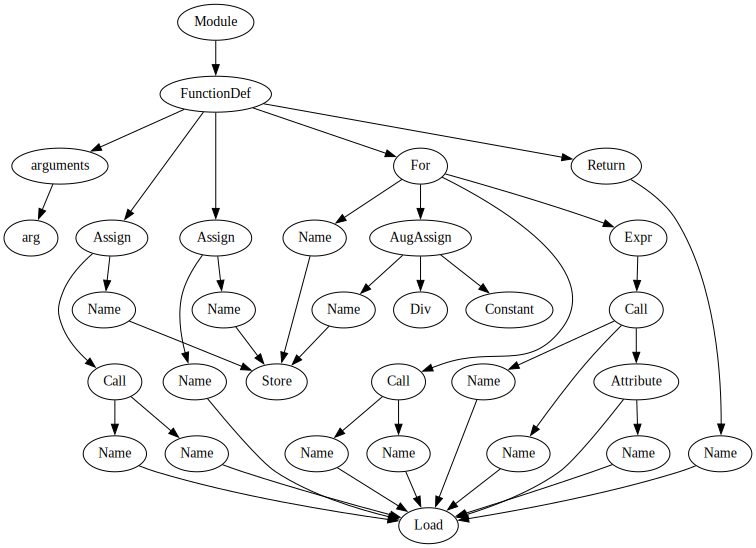

In [8]:
import ast
from graphviz import Digraph

def show_ast(ast_node, dot=None):
    if dot is None:
        dot = Digraph()
        dot.node(name=str(id(ast_node)), label=type(ast_node).__name__)

    for child in ast.iter_child_nodes(ast_node):
        dot.node(name=str(id(child)), label=type(child).__name__)
        dot.edge(str(id(ast_node)), str(id(child)))
        show_ast(child, dot)

    return dot

code = """
## 
def rx_c(n):
    qc = QuantumCircuit(n)
    angle = pi
    for i in range(n):
        qc.rx(angle, i)
        angle /= 2
    return qc
"""
transformed_code = LoggingTransformer.add_logging(code)
print(transformed_code)
parsed_ast=ast.parse(code)
print(ast.dump(parsed_ast))
show_ast(parsed_ast)


In [61]:
code
transformed_code = LoggingTransformer.add_logging(code)
print(transformed_code)

def rx_c(n):
    qc = QuantumCircuit(n)
    angle = pi
    for i in range(n):
        qc.rx(angle, i)
        angle /= 2
    return qc


def h_c(n) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    return qc
Module(body=[FunctionDef(name='h_c', args=arguments(posonlyargs=[], args=[arg(arg='n')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Assign(targets=[Name(id='qc', ctx=Store())], value=Call(func=Name(id='QuantumCircuit', ctx=Load()), args=[Name(id='n', ctx=Load())], keywords=[])), For(target=Name(id='i', ctx=Store()), iter=Call(func=Name(id='range', ctx=Load()), args=[Name(id='n', ctx=Load())], keywords=[]), body=[Expr(value=Call(func=Attribute(value=Name(id='qc', ctx=Load()), attr='h', ctx=Load()), args=[Name(id='i', ctx=Load())], keywords=[]))], orelse=[]), Return(value=Name(id='qc', ctx=Load()))], decorator_list=[], returns=Name(id='QuantumCircuit', ctx=Load()))], type_ignores=[])


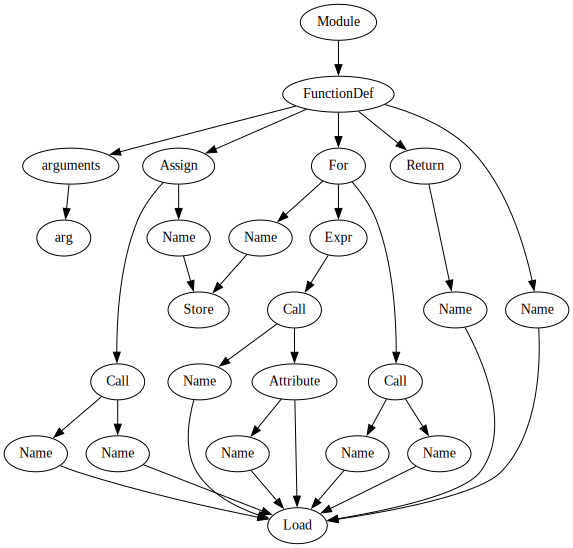

In [108]:
basecode = """
def h_c(n) -> QuantumCircuit:
    
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    return qc
"""

forcode = """
for i in range(0,n):
    x = i
"""

gatecode = """
qc.h(i)
"""

transformed_code = LoggingTransformer.add_logging(basecode)
print(transformed_code)
parsed_ast=ast.parse(basecode)
print(ast.dump(parsed_ast))
show_ast(parsed_ast)

# transformed_code = LoggingTransformer.add_logging(forcode)
# print(transformed_code)
# parsed_ast=ast.parse(forcode)
# print(ast.dump(parsed_ast))
# show_ast(parsed_ast)



##### skeleton code mode